# Assignment 1: Regression Using Least Squares


## 1. Generate 50 2D-data points

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining the function
def f(x):
    return (0.4345*x**3 - 5.607*x**2 + 16.78 * x - 10.61)

# Generating 50 data points
x = np.arange(0, 9, 0.18)
y = f(x)

# M = 3
m = np.array([x**i for i in range(4)]).transpose()

## 2. Add Gaussian random noise to the data

In [3]:
# Generating noisy data
noise = np.random.normal(0, 3, 50)
gauss_y = y + noise

## 3. Fit the generated noisy data using the least squares method based on a polynomial function - normal inverse

[-10.03703873  -7.25278702  -4.80871924  -2.69011694  -0.8822617
   0.62956491   1.86008133   2.824006     3.53605734   4.01095379
   4.26341378   4.30815574   4.15989811   3.83335933   3.34325781
   2.70431201   1.93124034   1.03876125   0.04159316  -1.04554549
  -2.20793627  -3.43086074  -4.69960047  -5.99943703  -7.31565199
  -8.63352691  -9.93834336 -11.21538291 -12.44992711 -13.62725755
 -14.73265579 -15.75140339 -16.66878192 -17.47007295 -18.14055804
 -18.66551877 -19.03023669 -19.21999338 -19.22007041 -19.01574933
 -18.59231172 -17.93503914 -17.02921316 -15.86011535 -14.41302727
 -12.67323049 -10.62600659  -8.25663711  -5.55040364  -2.49258774]


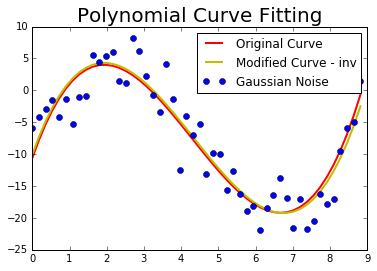

In [4]:
def normal_inv(gauss_y, m):
    b = np.array(gauss_y)                            # points on the line
    mtm = np.linalg.inv(np.dot(m.transpose(),m))
    mplus = np.dot(mtm, m.transpose())
    return (np.dot(mplus, b))                       # calculating for the coefficients

def generate_points(weight, x):
    z = 0
    for i in range(len(weight)):
        z += weight[i] * (x ** i)
    return (z)

w_inv = normal_inv(gauss_y, m)
y_est = generate_points(w_inv, x)
print(y_est)

# Plotting the data
def plot_data(x, y, y_est, typ):
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("Polynomial Curve Fitting", fontsize=20)
    org_line = plt.plot(x, y, label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    est_line = plt.plot(x, y_est, label = "Modified Curve - " + typ)
    plt.setp(est_line, color='y', linewidth = 2.0)
    plt.plot(x, gauss_y, "bo", label = "Gaussian Noise")
    plt.legend()
    plt.show()
    
plot_data(x, y, y_est, "inv")

## 3. Fit the generated noisy data using the least squares method based on a polynomial function - pinv

[-10.03703873  16.44027675  -5.47688821   0.4206228 ]
[-10.03703873  -7.25278702  -4.80871924  -2.69011694  -0.8822617
   0.62956491   1.86008133   2.824006     3.53605734   4.01095379
   4.26341378   4.30815574   4.15989811   3.83335933   3.34325781
   2.70431201   1.93124034   1.03876125   0.04159316  -1.04554549
  -2.20793627  -3.43086074  -4.69960047  -5.99943703  -7.31565199
  -8.63352691  -9.93834336 -11.21538291 -12.44992711 -13.62725755
 -14.73265579 -15.75140339 -16.66878192 -17.47007295 -18.14055804
 -18.66551877 -19.03023669 -19.21999338 -19.22007041 -19.01574933
 -18.59231172 -17.93503914 -17.02921316 -15.86011535 -14.41302727
 -12.67323049 -10.62600659  -8.25663711  -5.55040364  -2.49258774]


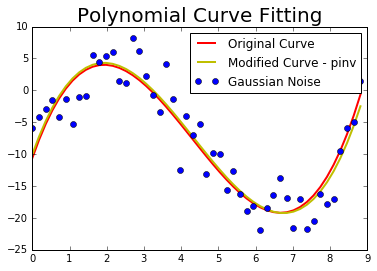

In [5]:
b = np.array(gauss_y) 
w_pinv = np.dot(np.linalg.pinv(m), b)
print(w_pinv)

y_est = generate_points(w_pinv, x)
print(y_est)

%matplotlib inline

# Plotting the data
plot_data(x, y, y_est, "pinv")

## 5. Compute and display the error value, E(w)




In [6]:
def E(w, x, y):
    z = 0
    for i in range(len(x)):
        z += (generate_points(w, x[i]) - y[i])**2
    return (0.5*z)

error = E(w_pinv, x, y)
print("Error = %s" % error)

Error = 8.47226087568


## 6. Display the estimated values of w

In [7]:
print("w_pinv = %s " % w_pinv)
print("w_inv = %s " % w_inv)

w_pinv = [-10.03703873  16.44027675  -5.47688821   0.4206228 ] 
w_inv = [-10.03703873  16.44027675  -5.47688821   0.4206228 ] 


## 7. Experiment with your code by changing M to various values. 

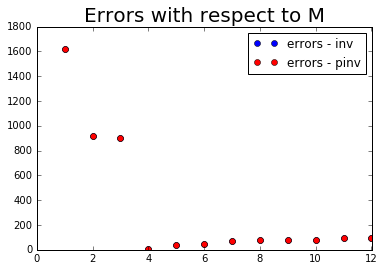

In [8]:
def generate_error_values(M, x, gauss_y, typ):
    matrix = np.array([x**i for i in range(M)]).transpose()
    if typ == "inv":
        w_inv= normal_inv(gauss_y, matrix)
    if typ == "pinv":
        w_inv = np.dot(np.linalg.pinv(matrix), gauss_y)
    error = E(w_inv, x, y)
    return error

def create_arrayoferrors(M, typ):
    error_arr = []
    for i in range(M):
        error = generate_error_values(i+1, x, gauss_y, typ)
        error_arr.append(error)
    return error_arr

err_inv = create_arrayoferrors(12, "inv")
err_pinv = create_arrayoferrors(12, "pinv")
M = [i+1 for i in range(12)]

def plot_error(err_inv, err_pinv, M, typ1, typ2):
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("Errors with respect to M", fontsize=20)
    plt.plot(M, err_inv, "bo", label = "errors - "+ typ1)
    plt.plot(M, err_pinv, "ro", label = "errors - "+ typ2)
    plt.legend()
    plt.show()
    
plot_error(err_inv, err_pinv, M, "inv", "pinv")

## 8. Change the noise levels, and apply the the same operations above

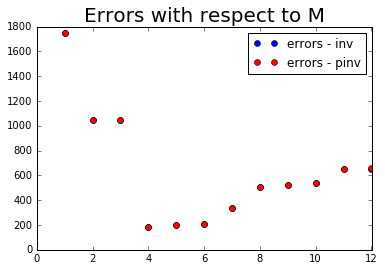

In [9]:
# Changing noise levels, with standard deviation of 10
noise = np.random.normal(0, 10, 50)
gauss_y = y + noise

err_inv = create_arrayoferrors(12, "inv")
err_pinv = create_arrayoferrors(12, "pinv")
M = [i+1 for i in range(12)]
plot_error(err_inv, err_pinv, M, "inv", "pinv")

## 9. Change the function for generating the data to:  y = sin(x^2 + 1), and apply the same operations as above

[ 0.84147098  0.84168704  0.84233439  0.84341062  0.84491166  0.84683184
  0.84916383  0.85189861  0.85502549  0.85853208  0.86240423  0.866626
  0.87117968  0.87604568  0.88120255  0.88662691  0.89229342  0.89817473
  0.90424145  0.91046211  0.91680311  0.92322869  0.92970092  0.93617963
  0.94262242  0.94898462  0.95521929  0.96127723  0.96710695  0.97265473
  0.9778646   0.98267844  0.98703598  0.99087489  0.99413087  0.99673775
  0.99862763  0.99973098  0.99997686  0.99929307  0.99760638  0.99484279
  0.99092774  0.98578646  0.97934428  0.97152696  0.9622611   0.95147454
  0.93909683  0.92505967]


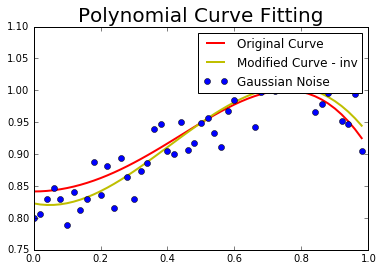

Error = 791.628002121
w_pinv = [-10.03703873  16.44027675  -5.47688821   0.4206228 ] 
w_inv = [ 0.82280567 -0.11073092  1.23396412 -1.01443726] 


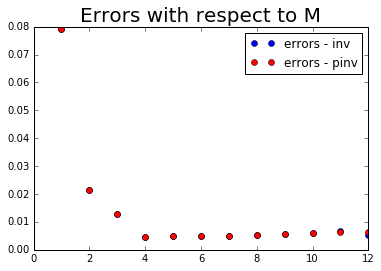

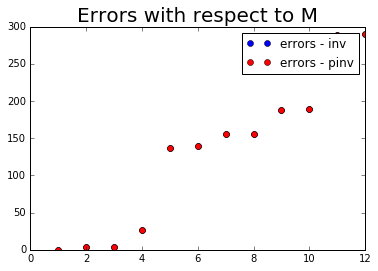

In [11]:
# Generating 50 data points
"""
The bigger the range, the curve becomes more bendy, 
hard to fit with a polynomial function.
"""
x = np.arange(0, 1, 0.02)
x_bar = np.arange(0, 1, 0.02)
y = np.sin(x**2 + 1)
y_bar = np.sin(x_bar**2 + 1)

# M = 3
m = np.array([x**i for i in range(4)]).transpose()

"""
Be careful about the amount of noise because when the noise 
crosses the actual curve, it is hard to find a pattern
"""
# Generating noisy data
noise = np.random.normal(0, 0.03, 50)
gauss_y = y + noise

w_inv = normal_inv(gauss_y, m)
y_est = generate_points(w_inv, x)
print(y)
def plot_curve():
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("Polynomial Curve Fitting", fontsize=20)
    org_line = plt.plot(x_bar, y_bar, label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    est_line = plt.plot(x, y_est, label = "Modified Curve - " + "inv")
    plt.setp(est_line, color='y', linewidth = 2.0)
    plt.plot(x, gauss_y, "bo", label = "Gaussian Noise")
    plt.legend()
    plt.show()
    
plot_curve()

error = E(w_pinv, x, y)
print("Error = %s" % error)
print("w_pinv = %s " % w_pinv)
print("w_inv = %s " % w_inv)

err_inv = create_arrayoferrors(12, "inv")
err_pinv = create_arrayoferrors(12, "pinv")
M = [i+1 for i in range(12)]
plot_error(err_inv, err_pinv, M, "inv", "pinv")

# Changing noise levels, with standard deviation of 10
noise = np.random.normal(0, 10, 50)
gauss_y = y + noise

err_inv = create_arrayoferrors(12, "inv")
err_pinv = create_arrayoferrors(12, "pinv")
M = [i+1 for i in range(12)]
plot_error(err_inv, err_pinv, M, "inv", "pinv")
